In [53]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from keras.utils import np_utils
import pandas as pd

## Getting the MNIST dataset

In [2]:
from pathlib import Path
import requests
import pickle
import gzip

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)


with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((X_train, y_train), (X_test, y_test), _) = pickle.load(f, encoding="latin-1")

(50000, 784) (50000,)


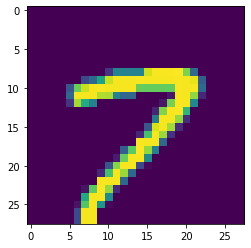

In [48]:
#looking at some images from dataset
index = 123
plt.imshow(X_train[index].reshape((28,28)))

dummy_y_train = np_utils.to_categorical(y_train)
dummy_y_test = np_utils.to_categorical(y_test)

In [49]:
dummy_y_train.shape

(50000, 10)

## Creating the model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [51]:
model = Sequential()

#input layer 748 neurons
model.add(Dense(28*28, activation="relu"))
model.add(Dropout(0.3))

#hidden layer №1 
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))

#hidden layer №2 
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))

#hidden layer №3 
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))

#output layer 
model.add(Dense(10, activation=tf.keras.activations.softmax))

model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

## Training model

In [56]:
model.fit(x=X_train,
          y=dummy_y_train,
          epochs=10,
          validation_data=(X_test, dummy_y_test))

Epoch 1/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0592 - accuracy: 0.9857 - val_loss: 0.0847 - val_accuracy: 0.9807
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0566 - accuracy: 0.9863 - val_loss: 0.1155 - val_accuracy: 0.9799
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0547 - accuracy: 0.9870 - val_loss: 0.0932 - val_accuracy: 0.9827
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0559 - accuracy: 0.9866 - val_loss: 0.0942 - val_accuracy: 0.9823
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0530 - accuracy: 0.9871 - val_loss: 0.1054 - val_accuracy: 0.9807
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0526 - accuracy: 0.9877 - val_loss: 0.1037 - val_accuracy: 0.9821
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0520 - accuracy: 0.9878 - val_loss: 0.1142 - val_ac

In [57]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

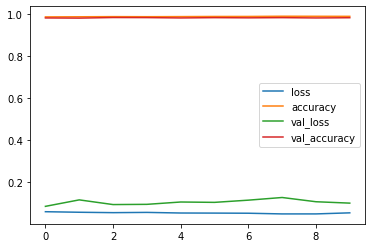

In [58]:
losses.plot()

In [59]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [69]:
preds = [np.argmax(predictions[x]) for x in range(len(predictions))]

In [62]:
from sklearn.metrics import accuracy_score

In [72]:
print(accuracy_score(y_test, preds))

0.9817


<div id="header" align="center">
  <img src="https://c.tenor.com/Mf937DWwuj0AAAAM/twerk-dance.gif" width="270"/>
</div>